## STABILITY ANALYSIS OF SIRS MODEL WITH FEEDBACK

#### Code written by Joel Wagner, expanded by Jannis Fischer, Ruben Haag, Daniel Schöning and Katharina Wolf

In [1]:
############## STABILITY ANALYSIS OF SIRS MODEL WITH FEEDBACK #######################

############ Include all the needed packages ###########
import numpy as np
import matplotlib.pyplot as plt
import csv
import importlib
import pandas as pd
import pickle
import matplotlib.gridspec as gridspec
import sys
import time
sys.path.append('../code')
import sirs
import params
import plotting
import stability

########################################################
plotting.set_rcParams()

In [2]:
plt.style.use('dark_background')                           #use dark style
importlib.reload(params)                                   #load param-file
T_ranger5 = np.linspace(1,100, num = 300)                  #Range of mean memory time T: 1...100 in 300 datapoints
p_base_ranger5 = np.linspace(0.01, 0.4, num=300)           #Range of p_base T: 0.01 ... 0.4 in 300 datapoints

karte = np.zeros((len(T_ranger5), len(p_base_ranger5)))-10 #create map for results

for n,T in enumerate(T_ranger5):
    for m,p_b in enumerate(p_base_ranger5):                #run all different datapoints
        
        ############ Load and overwrite Parameters ###########
        p = params.p                                   
        p['y0'][-1]=0.001
        p['y0'][-2]=0.001
        p['pbase'] = p_b
        p['tau'] = T
        p['H1'] = 0.001
        p['H'] = 0.001
        ########################################################
        
        EW = stability.largestEW(p)                        #detect eigenvalues and chose the largest
        karte[-n,m]=EW>=0                                  #if largest eigenvalue is negative, the system is stable

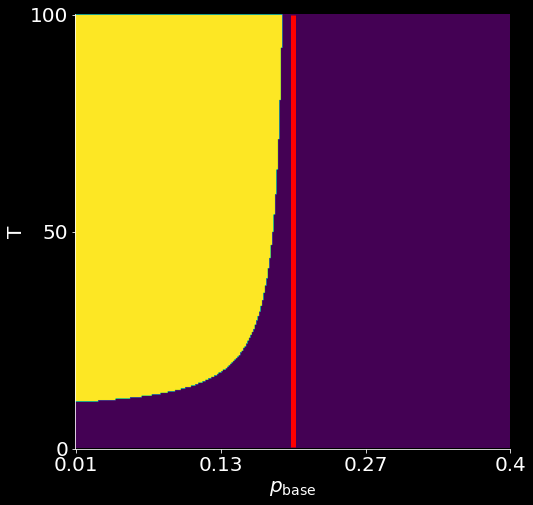

In [3]:
############ Load and overwrite Parameters ###########

#plotting, setting the labels and saving the figure
plt.figure(figsize=(8,8))
plt.imshow(karte)
plt.xlabel(r'$p_{\mathrm{base}}$', size = 25)
plt.ylabel("T", size = 25)
plt.vlines(0.2/0.4*300,0,299,colors='r',lw=5)   # expected value for critical p_base
plt.yticks([0,150,300], [100,50,0], fontsize=25, rotation=0)
plt.xticks([0,100, 200, 300], [0.01,0.13,0.27,0.4], fontsize=25, rotation=0)

plt.savefig("JoelModel_New.png")
########################################################